In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import xarray as xr
import metpy.calc
from metpy.units import units
from numpy import sqrt,mod,arctan2
import os
import pandas as pd
import shutil
from netCDF4 import Dataset
from datetime import datetime
import matplotlib 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.colors as colors
import matplotlib as mpl 
import matplotlib.ticker as mticker
# import cmaps
from copy import copy
import shapely.geometry as sgeom
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
import scipy

### 读文件

In [13]:
file='/thfs1/home/qx_hyt/hpp/data/GRID_TJHY_PUB_EDA_AFTJ_000_DT_20230331200000_000-240_2206.nc'
file_var=xr.open_dataset(file)

u_test=file_var['U'][:,:,:]
u_test=file_var['V'][:,:,:]
wspd=sqrt( u*u+v*v )
wdir=metpy.calc.wind_direction(u*units('m/s'), v*units('m/s'), convention='from')
# wdir=metpy.calc.wind_direction(u*units('m/s'), v*units('m/s'), convention='from')
# x=metpy.calc.sweat_index(p_time,np.mean(t_mean,axis=(1,2)),np.mean(Td,axis=(1,2)),wspd.mean(),wdir.mean(),vertical_dim=0)[0].magnitude  
# wdir=mod(180.0+arctan2(u,v),360.0)

In [17]:
u_test#[0,:,:]

<xarray.DataArray 'V' (time: 240, lat: 121, lon: 201)>
[5837040 values with dtype=float32]
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 ... 233 234 235 236 237 238 239 240
  * lat      (lat) float32 35.0 35.05 35.1 35.15 35.2 ... 40.85 40.9 40.95 41.0
  * lon      (lon) float32 117.0 117.1 117.1 117.2 ... 126.8 126.9 126.9 127.0
Attributes:
    units:

In [14]:
u_test[36,:,:]

<xarray.DataArray 'V' (lat: 121, lon: 201)>
[24321 values with dtype=float32]
Coordinates:
    time     int32 37
  * lat      (lat) float32 35.0 35.05 35.1 35.15 35.2 ... 40.85 40.9 40.95 41.0
  * lon      (lon) float32 117.0 117.1 117.1 117.2 ... 126.8 126.9 126.9 127.0
Attributes:
    units:

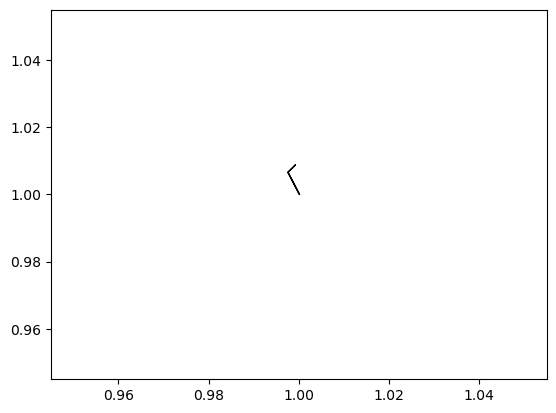

In [4]:
fig, ax = plt.subplots()
X, Y = np.meshgrid([1], [1])
ax.barbs(X, Y, u[0,0].values, v[0,0].values, length=6,barb_increments={'half':2,'full':4,'flag':20},
                  color='black', zorder=10, label='wind')

### picture

In [9]:
from deco import *

@concurrent(processes=4) # We add this for the concurrent function
def process_lat_lon(lat, lon, data):
  #Does some work which takes a while
  return result

@synchronized # And we add this for the function which calls the concurrent function
def process_data_set(data):
  results = defaultdict(dict)
  for lat in range(...):
    for lon in range(...):
      results[lat][lon] = process_lat_lon(lat, lon, data)
  return results

ModuleNotFoundError: No module named 'deco'

In [18]:
file='/thfs1/home/qx_hyt/hpp/data/GRID_TJHY_PUB_EDA_AFTJ_000_DT_20230331200000_000-240_2206.nc'
file_var=xr.open_dataset(file)
dur=48
time=pd.date_range(start = '4/02/2023',periods = 60,freq = 'h')
for i in range(0,dur):
        u=file_var['U'][28+i,:,:]
        v=file_var['V'][28+i,:,:]
        # wspd=sqrt( u*u+v*v )
        # wdir=metpy.calc.wind_direction(u*units('m/s'), v*units('m/s'), convention='from')

        bounds = [117., 127., 35., 41.]
        transform_sel = ccrs.PlateCarree()
        proj = ccrs.LambertConformal(central_longitude=118, central_latitude=32,
                                standard_parallels=(30, 60))
        matplotlib.rcParams['xtick.labelsize'] = 8
        matplotlib.rcParams['ytick.labelsize'] = 8
        matplotlib.rcParams["font.weight"] = "bold"
        # crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
        fontdict = {'fontsize': 12,'fontweight' : 800}

        fig = plt.figure(1, figsize=(10, 10), constrained_layout=False)
        ax = fig.add_subplot(1, 1, 1, projection=proj)
        ax.set_extent(bounds, crs=ccrs.PlateCarree())
        ax.coastlines('50m', edgecolor='black', linewidth=0.75)

        gl = ax.gridlines(crs=ccrs.PlateCarree(), \
        draw_labels=True, x_inline=False, y_inline=False,linewidth=0.5, color='k', alpha=0.5, linestyle='--')
        gl.top_labels = False ##关闭上侧坐标显示
        gl.right_labels = False ##关闭右侧坐标显示
        gl.xformatter = LONGITUDE_FORMATTER ##坐标刻度转换为经纬度样式
        gl.yformatter = LATITUDE_FORMATTER 
        label_format = '{:,.1f}'
        ylabels = ax.get_yticks().tolist()
        xlabels = ax.get_xticks().tolist()
        ax.yaxis.set_major_locator(mticker.FixedLocator(ylabels))  
        ax.set_yticklabels([label_format.format(x) for x in ylabels]) 

        # ax.yaxis.set_major_locator(mticker.FixedLocator(xlabels))  
        # ax.set_xticklabels([label_format.format(x) for x in xlabels], rotation=45) 
        # ax.set_xticklabels([label_format.format(x) for x in xlabels],rotation=30) 

        # gl.xlocator = mticker.FixedLocator(np.arange(bounds[0], bounds[1]+1, 1.0))
        # gl.ylocator = mticker.FixedLocator(np.arange(bounds[2], bounds[3]+1, 1.0))
        gl.xlabel_style={
        'size':6}
        gl.ylabel_style={
        'size':6}
        # ax.tick_params(which='major', labelrotation=30)
        # ax.set_extent((bounds), transform_sel)     #显示所选择的区域
        ax.add_feature(cfeature.LAND, facecolor='0.9') #Grayscale colors can be set using 0 (black) to 1 (white)
        # ax.add_feature(cfeature.LAKES, alpha=0.9, zorder=1)  #Alpha sets transparency (0 is transparent, 1 is solid)
        ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
        ax.add_feature(cfeature.RIVERS, zorder=1) # low resolution

        states_provinces = cfeature.NaturalEarthFeature(
                category='cultural',  name='admin_1_states_provinces_lines',
                scale='50m',facecolor='none')
        ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
        fname = '/thfs1/home/qx_hyt/hpp/map/bou2_4p.shp'
        adm1_shapes = list(Reader(fname).geometries())
        ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.6)

        states_diqu = cfeature.NaturalEarthFeature(
                category='cultural',  name='admin_1_states_provinces_lines',
                scale='50m',facecolor='none')
        ax.add_feature(states_diqu, edgecolor='gray', zorder=10)
        fname_di = '/thfs1/home/qx_hyt/hpp/map/ChinaMap/China_DiQuJie_Polyline.shp'
        adm2_shapes = list(Reader(fname_di).geometries())
        ax.add_geometries(adm2_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.7)
        # ax.set_xticklabels(ax.get_xticks(), rotation = 45)

        ax.add_feature(cfeature.STATES, linewidth=0.25)
        jet300 = ax.barbs(u['lon'][::8], u['lat'][::8], u[:,:][::8,::8].values, v[:,:][::8,::8].values, length=6,barb_increments={'half':2,'full':4,'flag':20},
                        transform=ccrs.PlateCarree(),
                        color='black', zorder=10, label='wind')
        # green = mpatches.Patch(color='black', label='Surface Td > 65 F')
        # leg = plt.legend(handles=[jet300], loc=3,framealpha=1)
        # leg.set_zorder(100)
        plt.title("2023-03-31 20:00:00", loc='left',fontsize=12,fontweight='heavy')
        plt.title(time[i], loc='right',fontsize=12,fontweight='heavy')
        plt.savefig("/thfs1/home/qx_hyt/hpp/output_data/wind/2_3/"+str(time[i])+".jpg",dpi=600, bbox_inches='tight')
        plt.close('all')
# plt.setp(ax.get_xticklabels(), rotation=45)
# plt.xticks(rotation=30)